In [ ]:
import pandas as pd
df = pd.read_csv('data.csv')

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-30 07:40:30,2015-01-30 07:44:27,1,0.354785,77.593108,12.975465,1,N,77.592409,12.975567,1,30.0,0.0,0.5,1.06,0.0,0.3,30.0
1,1,2015-01-30 08:42:22,2015-01-30 08:56:39,1,1.465418,77.589296,12.974401,1,N,77.591871,12.974686,1,30.0,0.0,0.5,1.20,0.0,0.3,30.0
2,1,2015-01-26 13:04:14,2015-01-26 13:10:11,1,0.694145,77.590514,12.973442,1,N,77.591499,12.972595,1,30.0,0.0,0.5,1.35,0.0,0.3,30.0
3,1,2015-01-13 14:43:25,2015-01-13 14:51:18,1,0.694145,77.593709,12.975845,1,N,77.593388,12.976780,1,30.0,0.0,0.5,1.50,0.0,0.3,30.0
4,1,2015-01-15 10:56:59,2015-01-15 11:10:42,1,1.002654,77.594621,12.976659,1,N,77.592774,12.976476,2,30.0,0.0,0.5,0.00,0.0,0.3,30.0


In [ ]:
selected_columns = df.loc[:, ['tpep_pickup_datetime','pickup_latitude', 'pickup_longitude']]
selected_columns.columns = ['start_time','start_lat', 'start_lng']

In [ ]:
df_data_subset = selected_columns.copy()[:50000]

In [ ]:
df_data_subset.head()

,start_time,start_lat,start_lng
0,2015-01-30 07:40:30,12.975465,77.593108
1,2015-01-30 08:42:22,12.974401,77.589296
2,2015-01-26 13:04:14,12.973442,77.590514
3,2015-01-13 14:43:25,12.975845,77.593709
4,2015-01-15 10:56:59,12.976659,77.594621


In [ ]:
df_data_subset.isna().sum()

,0
start_time,0
start_lat,0
start_lng,0


In [ ]:
converted_datetime = pd.to_datetime(df_data_subset['start_time'])
converted_datetime = converted_datetime.dt.strftime('%Y-%m-%d %H:%M:%S')

converted_datetime = pd.to_datetime(converted_datetime)
date_range = converted_datetime.max() - converted_datetime.min()
print(f"Date range = {date_range}.")

Date range = 30 days 23:47:24.


In [ ]:
# append date and time separately to the main dataframe
df_data_subset['start_date'] = converted_datetime.dt.date
df_data_subset['start_time'] = converted_datetime.dt.time
df_data_subset['start_time_hour'] = converted_datetime.dt.hour
df_data_subset['start_time_minute'] = converted_datetime.dt.minute
df_data_subset['start_time_second'] = converted_datetime.dt.second

# check dataframe
df_data_subset.head()

,start_time,start_lat,start_lng,start_date,start_time_hour,start_time_minute,start_time_second
0,07:40:30,12.975465,77.593108,2015-01-30,7,40,30
1,08:42:22,12.974401,77.589296,2015-01-30,8,42,22
2,13:04:14,12.973442,77.590514,2015-01-26,13,4,14
3,14:43:25,12.975845,77.593709,2015-01-13,14,43,25
4,10:56:59,12.976659,77.594621,2015-01-15,10,56,59


In [ ]:
# add "day_of_week" and "is_weekend" features to the dataframe
day_of_week = []
is_weekend = []

# loop through every row of the column "start_date"
for i in df_data_subset['start_date']:

    # by default, the .weekday method returns 0=monday -> 6=sunday.
    # +1 to make more sense. 1=monday -> 7=sunday.
    day = i.weekday()+1
    day_of_week.append(day)

    # if day falls on either saturday or sunday, make value = 1, else value = 0.
    weekend = 1 if day == 6 or day == 7 else 0
    is_weekend.append(weekend)

# append features to the dataframe
df_data_subset['day_of_week'] = day_of_week
df_data_subset['is_weekend'] = is_weekend

In [ ]:
df_data_subset.drop(columns=['start_date'], inplace=True)
df_data_subset.head()

,start_time,start_lat,start_lng,start_time_hour,start_time_minute,start_time_second,day_of_week,is_weekend
0,07:40:30,12.975465,77.593108,7,40,30,5,0
1,08:42:22,12.974401,77.589296,8,42,22,5,0
2,13:04:14,12.973442,77.590514,13,4,14,1,0
3,14:43:25,12.975845,77.593709,14,43,25,2,0
4,10:56:59,12.976659,77.594621,10,56,59,4,0


In [ ]:
df_data_subset.drop(columns=['start_time','start_time_second'], inplace=True)
df_data_subset.head()

,start_lat,start_lng,start_time_hour,start_time_minute,day_of_week,is_weekend
0,12.975465,77.593108,7,40,5,0
1,12.974401,77.589296,8,42,5,0
2,12.973442,77.590514,13,4,1,0
3,12.975845,77.593709,14,43,2,0
4,12.976659,77.594621,10,56,4,0


In [ ]:
# Assigning location clusters. Clustering nearby locations
from sklearn.cluster import DBSCAN
import joblib

# Step 1: Extract coordinates for clustering
coords = df_data_subset[['start_lat', 'start_lng']].values

# Step 2: Apply DBSCAN for location clustering
db = DBSCAN(eps=0.0001, min_samples=2).fit(coords)  # eps ≈ 200m

# Step 3: Assign cluster labels to dataframe
df_data_subset['location_cluster'] = db.labels_

# Save the DBSCAN model
joblib.dump(db, 'dbscan_model.pkl')

df_data_subset.head()

,start_lat,start_lng,start_time_hour,start_time_minute,day_of_week,is_weekend,location_cluster
0,12.975465,77.593108,7,40,5,0,0
1,12.974401,77.589296,8,42,5,0,0
2,12.973442,77.590514,13,4,1,0,0
3,12.975845,77.593709,14,43,2,0,0
4,12.976659,77.594621,10,56,4,0,0


In [ ]:
df_filtered = df_data_subset[df_data_subset['location_cluster'] != -1]

df_filtered.head()

,start_lat,start_lng,start_time_hour,start_time_minute,day_of_week,is_weekend,location_cluster
0,12.975465,77.593108,7,40,5,0,0
1,12.974401,77.589296,8,42,5,0,0
2,12.973442,77.590514,13,4,1,0,0
3,12.975845,77.593709,14,43,2,0,0
4,12.976659,77.594621,10,56,4,0,0


In [ ]:
df_filtered["location_cluster"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
# Sample DataFrame (Assuming your data is already loaded as df_data_subset)
df = df_filtered.copy()

# Step 1: Create a 15-minute time bucket
df['time_window'] = (df['start_time_minute'] // 15) * 15  # Converts 0-59 minutes into [0, 15, 30, 45]

# Step 2: Group by location_cluster, start_time_hour, and 15-min time window
df_grouped = (
    df.groupby(['location_cluster', 'start_time_hour', 'time_window', 'day_of_week', 'is_weekend'])
    .size()  # Count trips per group
    .reset_index(name='demand')  # Rename count column to 'demand'
)

# Step 3: Retain only required columns (No extra ones)
df_grouped = df_grouped[['location_cluster', 'start_time_hour', 'time_window', 'day_of_week', 'is_weekend', 'demand']]

df_grouped.head()

,location_cluster,start_time_hour,time_window,day_of_week,is_weekend,demand
0,0,0,0,1,0,31
1,0,0,0,2,0,33
2,0,0,0,4,0,82
3,0,0,0,6,1,73
4,0,0,0,7,1,73


In [ ]:
df_grouped["demand"].unique()

array([ 31,  33,  82,  73,  52,  58,  72,  28, 167,  40,  18,  60, 155,
       108,  97,  77,  17,  51,  19,  55,  98,  36,  54,  90,  13,  83,
        39,  35,  37,  21,  61, 100,  34,  11,  20,  93,  26,  91,  38,
        16,  56,  71,  75,  32, 113,  95,  22,  12,   5,  14,  15,  80,
       118,  79, 116,  41, 162, 117,  94,  78, 179,  29, 214,   6,  62,
       101, 105, 133,  96,  84,  99, 112,  74,  59, 218, 115,  76,  69,
        43, 140,  42, 122, 119,   2,  64, 114,  81, 102, 142, 159, 104,
       124, 103, 144,  50,  57,  85, 132, 120, 197, 173, 145, 184, 165,
       178, 181,  53, 160, 136, 139, 172, 174, 123, 170, 177, 202, 183,
       138, 134, 143, 240, 110, 156, 163, 135, 158, 180, 137, 106,  88,
       149, 212, 121, 220, 200, 157, 230, 151,  67, 194,   1,   3,   4,
         7,   8])

In [ ]:
# Grouping the data based on location

# Assuming df_grouped has location_cluster, and df_data_subset has lat/lng
df_merged = df_filtered[['location_cluster', 'start_lat', 'start_lng']]

# Group by location_cluster and calculate mean latitude & longitude
df_cluster_centroids = df_merged.groupby("location_cluster", as_index=False).agg({
    "start_lat": "mean",
    "start_lng": "mean"
})

# Display result
df_cluster_centroids
df_cluster_centroids.to_csv("cluster_centroids.csv", index=False)

In [ ]:
import folium

# Initialize a Folium map centered around the average location
map_center = [df_cluster_centroids["start_lat"].mean(), df_cluster_centroids["start_lng"].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add clusters to the map
for _, row in df_cluster_centroids.iterrows():
    folium.Marker(
        location=[row["start_lat"], row["start_lng"]],
        popup=f"Cluster {int(row['location_cluster'])}",
        icon=folium.Icon(color="blue" if row["location_cluster"] != -1 else "red")
    ).add_to(m)

# Display the map
m

In [ ]:
# Step 1: Aggregate demand per cluster
df_cluster_demand = df_grouped.groupby("location_cluster", as_index=False).agg({
    "demand": "sum"  # Sum up demand for all time windows per cluster
})

# Step 2: Merge demand with cluster centroids
df_cluster_centroids = df_cluster_centroids.merge(df_cluster_demand, on="location_cluster", how="left")

df_cluster_centroids

,location_cluster,start_lat,start_lng,demand
0,0,12.975329,77.591804,44951
1,1,8.900000,84.990000,911
2,2,12.976978,77.603599,410
3,3,12.973013,77.594565,4
4,4,12.970357,77.596821,6
...,...,...,...,...
299,299,12.981513,77.596372,2
300,300,12.976884,77.600856,3
301,301,12.967650,77.591944,2
302,302,12.964474,77.610428,2


In [ ]:
# Map with demand

# Step 3: Initialize Folium Map
map_center = [df_cluster_centroids["start_lat"].mean(), df_cluster_centroids["start_lng"].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Step 4: Add Clusters to Map with Demand Info
for _, row in df_cluster_centroids.iterrows():
    folium.Marker(
        location=[row["start_lat"], row["start_lng"]],
        popup=f"Cluster {int(row['location_cluster'])}<br>Demand: {row['demand']}",
        icon=folium.Icon(color="blue" if row["location_cluster"] != -1 else "red")
    ).add_to(m)

# Step 5: Display Map
m

In [ ]:
# Some observations from the final data
# Unique demand

df_grouped["demand"].unique()

array([ 31,  33,  82,  73,  52,  58,  72,  28, 167,  40,  18,  60, 155,
       108,  97,  77,  17,  51,  19,  55,  98,  36,  54,  90,  13,  83,
        39,  35,  37,  21,  61, 100,  34,  11,  20,  93,  26,  91,  38,
        16,  56,  71,  75,  32, 113,  95,  22,  12,   5,  14,  15,  80,
       118,  79, 116,  41, 162, 117,  94,  78, 179,  29, 214,   6,  62,
       101, 105, 133,  96,  84,  99, 112,  74,  59, 218, 115,  76,  69,
        43, 140,  42, 122, 119,   2,  64, 114,  81, 102, 142, 159, 104,
       124, 103, 144,  50,  57,  85, 132, 120, 197, 173, 145, 184, 165,
       178, 181,  53, 160, 136, 139, 172, 174, 123, 170, 177, 202, 183,
       138, 134, 143, 240, 110, 156, 163, 135, 158, 180, 137, 106,  88,
       149, 212, 121, 220, 200, 157, 230, 151,  67, 194,   1,   3,   4,
         7,   8])

In [ ]:
# Some observations from the final data
# Time window - checking if window is proper

df_grouped["time_window"].unique()


array([ 0, 15, 30, 45], dtype=int32)

In [ ]:
# Some observations from the final data

df_grouped["start_time_hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [ ]:
# Total no of locations addressed

len(df_grouped["location_cluster"].unique())

304

In [ ]:
# Final data after cleaning, transformations etc
df_grouped

,location_cluster,start_time_hour,time_window,day_of_week,is_weekend,demand
0,0,0,0,1,0,31
1,0,0,0,2,0,33
2,0,0,0,4,0,82
3,0,0,0,6,1,73
4,0,0,0,7,1,73
...,...,...,...,...,...,...
3906,301,23,30,7,1,1
3907,302,7,30,5,0,1
3908,302,12,15,2,0,1
3909,303,1,15,2,0,1


In [ ]:
# Encoding day_of_week and is_weeknd => it has cyclic nature
# Encoding time-window
import numpy as np

max_time = 60

df_grouped["time_window_sin"] = np.sin(2 * np.pi * df_grouped["time_window"] / max_time)
df_grouped["time_window_cos"] = np.cos(2 * np.pi * df_grouped["time_window"] / max_time)

# Drop original column if needed
df_grouped.drop(columns=["time_window"], inplace=True)

# Check the transformed values
df_grouped.head()

,location_cluster,start_time_hour,day_of_week,is_weekend,demand,time_window_sin,time_window_cos
0,0,0,1,0,31,0.0,1.0
1,0,0,2,0,33,0.0,1.0
2,0,0,4,0,82,0.0,1.0
3,0,0,6,1,73,0.0,1.0
4,0,0,7,1,73,0.0,1.0


In [ ]:
# Encoding day_of_week using sin and cos

max_day = 7

# Apply cyclic encoding
df_grouped["day_of_week_sin"] = np.sin(2 * np.pi * df_grouped["day_of_week"] / max_day)
df_grouped["day_of_week_cos"] = np.cos(2 * np.pi * df_grouped["day_of_week"] / max_day)

# Drop the original column if needed
df_grouped.drop(columns=["day_of_week"], inplace=True)

# Check the transformed values
df_grouped.head()

,location_cluster,start_time_hour,is_weekend,demand,time_window_sin,time_window_cos,day_of_week_sin,day_of_week_cos
0,0,0,0,31,0.0,1.0,7.818315e-01,0.623490
1,0,0,0,33,0.0,1.0,9.749279e-01,-0.222521
2,0,0,0,82,0.0,1.0,-4.338837e-01,-0.900969
3,0,0,1,73,0.0,1.0,-7.818315e-01,0.623490
4,0,0,1,73,0.0,1.0,-2.449294e-16,1.000000


In [ ]:
# Encoding start_time_hour

max_hour = 24  # Full 24-hour cycle

df_grouped["start_time_hour_sin"] = np.sin(2 * np.pi * df_grouped["start_time_hour"] / max_hour)
df_grouped["start_time_hour_cos"] = np.cos(2 * np.pi * df_grouped["start_time_hour"] / max_hour)

# Drop original column if not needed
df_grouped.drop(columns=["start_time_hour"], inplace=True)

# Check transformed values
df_grouped.head()

,location_cluster,is_weekend,demand,time_window_sin,time_window_cos,day_of_week_sin,day_of_week_cos,start_time_hour_sin,start_time_hour_cos
0,0,0,31,0.0,1.0,7.818315e-01,0.623490,0.0,1.0
1,0,0,33,0.0,1.0,9.749279e-01,-0.222521,0.0,1.0
2,0,0,82,0.0,1.0,-4.338837e-01,-0.900969,0.0,1.0
3,0,1,73,0.0,1.0,-7.818315e-01,0.623490,0.0,1.0
4,0,1,73,0.0,1.0,-2.449294e-16,1.000000,0.0,1.0


In [ ]:
# extract columns to be used as input and output variables

# input variables
X = df_grouped[['location_cluster','is_weekend','time_window_sin','time_window_cos','day_of_week_sin','day_of_week_cos','start_time_hour_sin','start_time_hour_cos']]

# output variable
y = df_grouped['demand']

In [ ]:
X

,location_cluster,is_weekend,time_window_sin,time_window_cos,day_of_week_sin,day_of_week_cos,start_time_hour_sin,start_time_hour_cos
0,0,0,0.000000e+00,1.000000e+00,7.818315e-01,0.623490,0.000000e+00,1.000000
1,0,0,0.000000e+00,1.000000e+00,9.749279e-01,-0.222521,0.000000e+00,1.000000
2,0,0,0.000000e+00,1.000000e+00,-4.338837e-01,-0.900969,0.000000e+00,1.000000
3,0,1,0.000000e+00,1.000000e+00,-7.818315e-01,0.623490,0.000000e+00,1.000000
4,0,1,0.000000e+00,1.000000e+00,-2.449294e-16,1.000000,0.000000e+00,1.000000
...,...,...,...,...,...,...,...,...
3906,301,1,5.665539e-16,-1.000000e+00,-2.449294e-16,1.000000,-2.588190e-01,0.965926
3907,302,0,5.665539e-16,-1.000000e+00,-9.749279e-01,-0.222521,9.659258e-01,-0.258819
3908,302,0,1.000000e+00,2.832769e-16,9.749279e-01,-0.222521,1.224647e-16,-1.000000
3909,303,0,1.000000e+00,2.832769e-16,9.749279e-01,-0.222521,2.588190e-01,0.965926


In [ ]:
y

,demand
0,31
1,33
2,82
3,73
4,73
...,...
3906,1
3907,1
3908,1
3909,1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

# Handle outliers using Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(X)
mask = outliers != -1  # Keep only inliers

X, y = X[mask], y[mask]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,location_cluster,is_weekend,time_window_sin,time_window_cos,day_of_week_sin,day_of_week_cos,start_time_hour_sin,start_time_hour_cos
0,0,0,0.000000e+00,1.0,7.818315e-01,0.623490,0.0,1.000000e+00
1,0,0,0.000000e+00,1.0,9.749279e-01,-0.222521,0.0,1.000000e+00
2,0,0,0.000000e+00,1.0,-4.338837e-01,-0.900969,0.0,1.000000e+00
3,0,1,0.000000e+00,1.0,-7.818315e-01,0.623490,0.0,1.000000e+00
4,0,1,0.000000e+00,1.0,-2.449294e-16,1.000000,0.0,1.000000e+00
...,...,...,...,...,...,...,...,...
3874,287,0,0.000000e+00,1.0,-4.338837e-01,-0.900969,-0.5,8.660254e-01
3877,289,0,5.665539e-16,-1.0,-4.338837e-01,-0.900969,1.0,6.123234e-17
3888,293,0,0.000000e+00,1.0,-4.338837e-01,-0.900969,-0.5,8.660254e-01
3890,294,0,5.665539e-16,-1.0,-4.338837e-01,-0.900969,-0.5,8.660254e-01


In [ ]:
y

,demand
0,31
1,33
2,82
3,73
4,73
...,...
3874,1
3877,1
3888,1
3890,1


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [4, 6, 8],
    "subsample": [0.8, 1.0]
}

grid = GridSearchCV(XGBRegressor(random_state=42), params, cv=3, scoring="r2", verbose=1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"Best Parameters: {grid.best_params_}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.8}


In [ ]:

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_model = XGBRegressor(
    learning_rate=0.1,  # Reduce from 0.2
    max_depth=3,  # Reduce from 4
    n_estimators=250,  # Reduce from 300
    subsample=0.7,  # Reduce from 0.8
    colsample_bytree=0.8,  # Use 80% of features per tree
    gamma=0.1,  # Add regularization
    reg_lambda=1,  # L2 regularization
    reg_alpha=0.1,  # L1 regularization
    random_state=42
)

best_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 6.61
RMSE: 17.10
R² Score: 0.7836


In [ ]:
# Save the trained model
joblib.dump(best_model, 'xgb_regressor.pkl')

# Save the scaler (important for future predictions)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
y_test

,demand
3443,1
842,1
321,97
2351,1
1392,3
...,...
764,1
209,80
3381,1
1094,1


In [ ]:
pd.DataFrame({'demand': y_pred})

,demand
0,2.348940
1,1.673262
2,56.420071
3,0.480347
4,0.107741
...,...
738,2.514076
739,86.157509
740,0.878358
741,1.895075


In [ ]:
X_train

array([[-0.1444164 , -0.62508773, -1.3917876 , ..., -1.20358472,
         0.59626288, -1.33903227],
       [-0.37380664, -0.62508773, -1.3917876 , ..., -0.23952229,
         1.66757832,  0.03075061],
       [-0.70150698, -0.62508773,  1.40118522, ..., -1.20358472,
         0.22216146,  1.4488542 ],
       ...,
       [-0.70150698,  1.59977543, -1.3917876 , ...,  0.9626439 ,
        -1.02960625, -0.67830119],
       [ 2.18225605, -0.62508773,  0.00469881, ..., -0.23952229,
        -1.17400401,  0.39778283],
       [ 1.11722993, -0.62508773,  0.00469881, ..., -1.20358472,
        -0.7999026 ,  1.03350127]])

In [ ]:
best_model.predict(X_test)

array([ 2.34894037e+00,  1.67326176e+00,  5.64200706e+01,  4.80346769e-01,
        1.07741401e-01,  1.95956513e-01,  2.15952229e+00,  3.02710080e+00,
        1.95866718e+01,  3.12100768e+00,  1.64664984e+00,  6.96190338e+01,
        1.40729916e+00,  5.51344812e-01,  1.51011539e+00,  3.22133243e-01,
        1.65544760e+00,  1.46180427e+00,  1.02155998e+02,  1.45662987e+00,
        1.31707609e+00,  6.69043350e+01,  1.63110256e+00,  1.86453223e-01,
        2.59348702e+00,  3.09897161e+00,  1.97057986e+00,  6.81506813e-01,
        8.13475647e+01, -4.39480692e-01,  4.93222117e-01,  7.49071717e-01,
       -2.76713878e-01,  9.11512909e+01,  7.28582084e-01,  2.33354092e+00,
       -7.30450273e-01,  2.77199841e+00,  1.40479517e+00,  9.24254656e-01,
        3.02036438e+01,  1.12656295e+00,  1.22882903e+00,  3.13744473e+00,
        1.15788994e+02,  1.56043792e+00,  1.22365692e+02,  2.62069631e+00,
       -1.73545420e-01,  1.22077858e+00,  1.60588336e+00,  3.45920515e+00,
        7.05233688e+01, -

In [ ]:
y_test

,demand
3443,1
842,1
321,97
2351,1
1392,3
...,...
764,1
209,80
3381,1
1094,1


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Training R²: 0.8264, MAE: 4.85, RMSE: 13.76
Test R²: 0.7591, MAE: 6.63, RMSE: 17.46
Cross-Validation R² Scores: [0.76290989 0.75805789 0.75395161 0.82002306 0.80541801]
Mean Cross-Validation R²: 0.7801


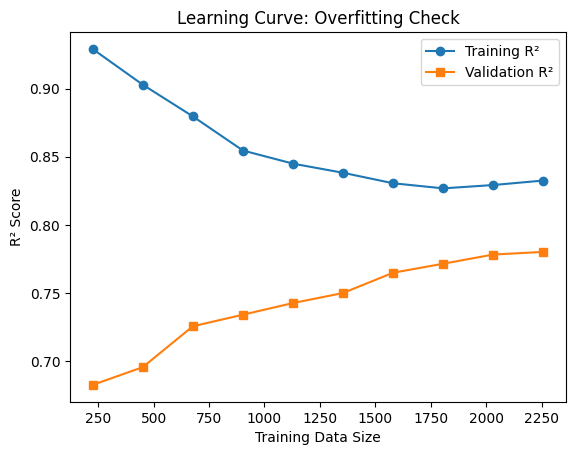

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Handle outliers using Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(X)
mask = outliers != -1  # Keep only inliers

X, y = X[mask], y[mask]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
params = {
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [4, 6, 8],
    "subsample": [0.8, 1.0]
}

grid = GridSearchCV(XGBRegressor(random_state=42), params, cv=3, scoring="r2", verbose=1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"Best Parameters: {grid.best_params_}")

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the best model
best_model.fit(X_train, y_train)

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluation Metrics
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

train_mae, train_rmse, train_r2 = evaluate(y_train, y_train_pred)
test_mae, test_rmse, test_r2 = evaluate(y_test, y_test_pred)

print(f"Training R²: {train_r2:.4f}, MAE: {train_mae:.2f}, RMSE: {train_rmse:.2f}")
print(f"Test R²: {test_r2:.4f}, MAE: {test_mae:.2f}, RMSE: {test_rmse:.2f}")

# Overfitting Check 1: Large Gap Between Train & Test R²?
if train_r2 - test_r2 > 0.1:
    print("⚠️ Possible Overfitting: Train R² is significantly higher than Test R².")

# Overfitting Check 2: Cross-Validation Score
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="r2")
mean_cv_r2 = np.mean(cv_scores)

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R²: {mean_cv_r2:.4f}")

if train_r2 - mean_cv_r2 > 0.1:
    print("⚠️ Possible Overfitting: Train R² is much higher than Cross-Validation R².")

# Overfitting Check 3: Learning Curve Plot
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training R²", marker="o")
plt.plot(train_sizes, test_mean, label="Validation R²", marker="s")
plt.xlabel("Training Data Size")
plt.ylabel("R² Score")
plt.legend()
plt.title("Learning Curve: Overfitting Check")
plt.show()
